Data Preparation

Download the historial daily data of the entire 2018 for the 6 stocks

tks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk. https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 5 stocks.

You should have 6 csv files on your disk now. IBM.csv, MSFT.csv, etc. Each of the csv file should look like below (Your actual numbers may be different from below)

image.png
Retrieve the "Adj Close" column values as the daily prices of each stock

Please read the csv file, and retrieve the "Adj Close" column values and store them into Numpy 2D array. Conceptually the array has one dimension representing the 6 stocks and another dimension representing the price sequence of 2018.

In [87]:
# data preparation

import pandas as pd

company_names = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']
price_sequences = []


for data in company_names:
    file_path = f"C://Users//srikr//Downloads//{data} (1).csv"
    df_list = pd.read_csv(file_path)
    adj_close = df_list['Adj Close'].values
    price_sequences.append(adj_close)

for i, company in enumerate(company_names):
    print(f'{company} Adj Close prices:')
    print(price_sequences[i])

IBM Adj Close prices:
[121.5784   119.483681 121.17849  121.616478 120.254921 118.950493
 119.312302 116.836746 116.170258 115.913177 116.884354 115.808434
 113.123405 115.694191 119.49321  119.721718 116.37973  113.132942
 112.114143 112.161751 111.942764 115.960785 114.294548 115.703697
 117.05574  116.646317 122.159203 123.682602 126.339073 126.567589
 128.548035 128.319519 131.880524 131.671051 131.585342 130.280914
 128.03389  130.404709 131.718643 133.33728  132.373795 136.073593
 137.942749 138.935135 139.070038 139.243484 140.756149 142.249573
 141.3246   143.656265 143.319031 142.952896 140.842865 141.141556
 143.463547 143.714066 143.241959 142.027969 142.11467  141.893066
 142.384445 141.681107 143.762253 145.072601 144.388504 137.162338
 135.042679 133.799759 136.121765 136.950363 135.736389 136.478256
 137.220154 134.907776 135.909805 135.746002 136.381912 137.39357
 135.957977 138.453415 138.308899 139.51326  139.956451 140.23587
 140.563446 139.889008 135.283539 135.4858

In [88]:
import numpy as np

stock_data = np.array(price_sequences)
stock_data

array([[121.5784  , 119.483681, 121.17849 , ..., 148.380005, 146.300003,
        146.550003],
       [249.806656, 243.03212 , 242.398239, ..., 337.940002, 331.769989,
        336.059998],
       [105.870003, 103.900002, 103.629997, ..., 137.740005, 136.070007,
        137.5     ],
       [154.394073, 151.47142 , 149.811249, ..., 179.360001, 176.300003,
        174.210007],
       [128.550003, 126.279999, 123.529999, ..., 143.100006, 141.229996,
        144.850006],
       [151.470001, 149.550003, 146.289993, ..., 307.559998, 301.660004,
        305.059998]])

In [89]:
stock_data.shape

# shape of the matrix is perfect, no need to perform data cleaning
# 6 is representing the company 
# 251 is representing extracted price sequence data of 02nd jan 2018 - 28th dec 2018 from the link

(6, 251)

Plot the daily price curve for each stock. So you will have 6 plots.

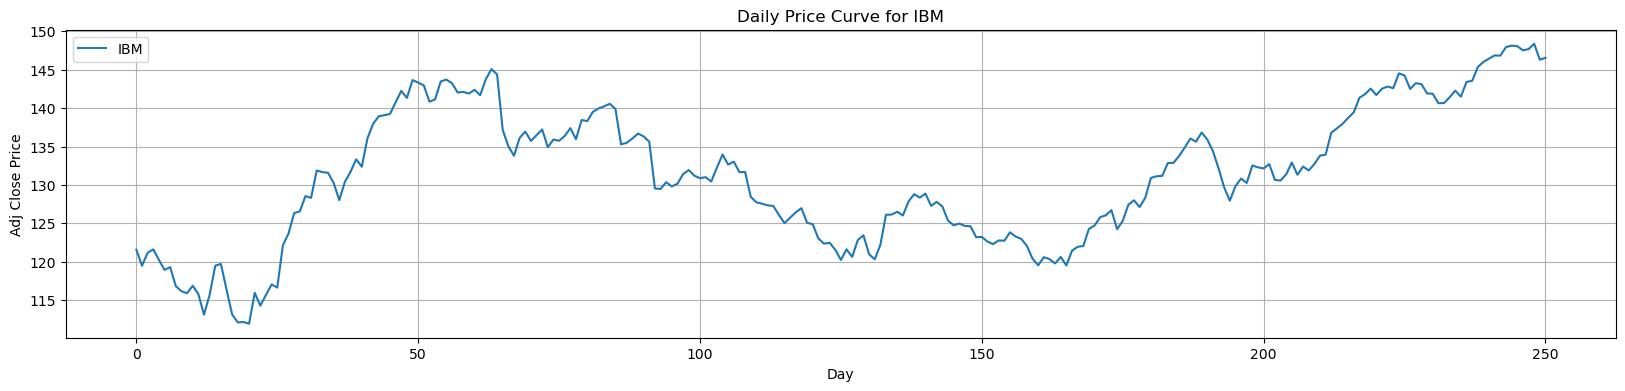

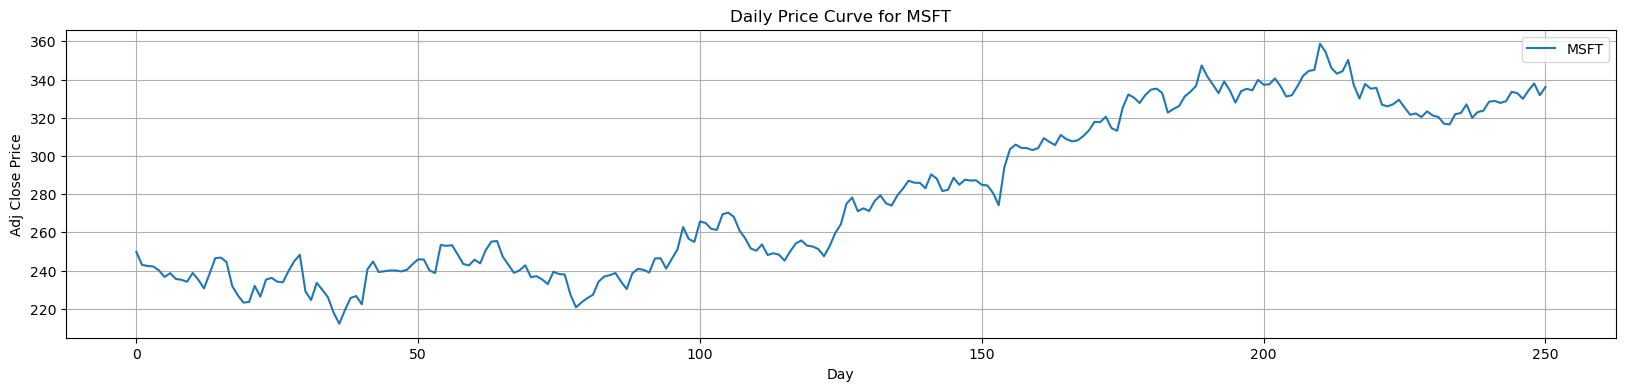

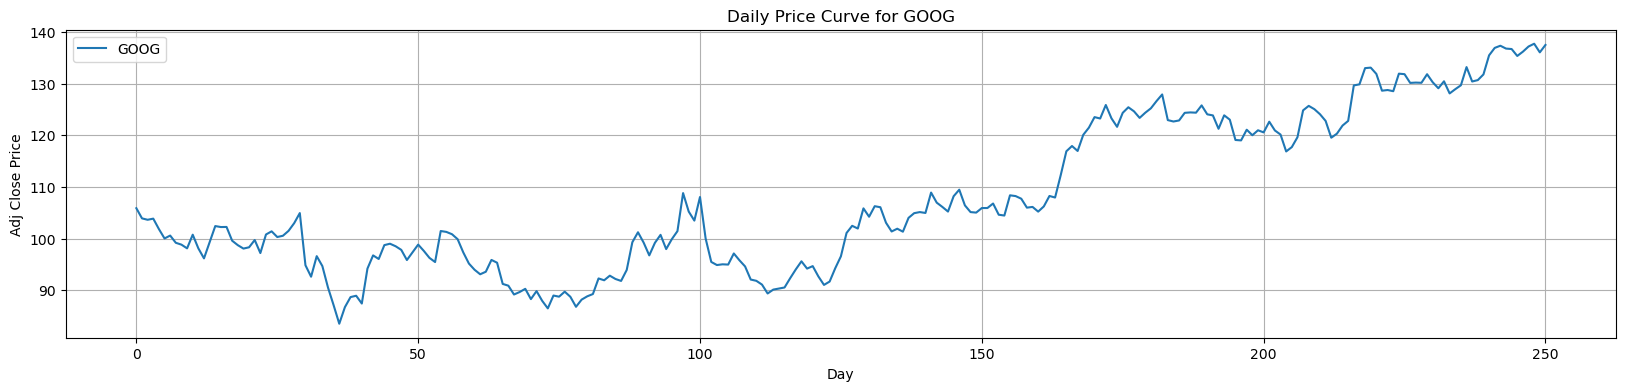

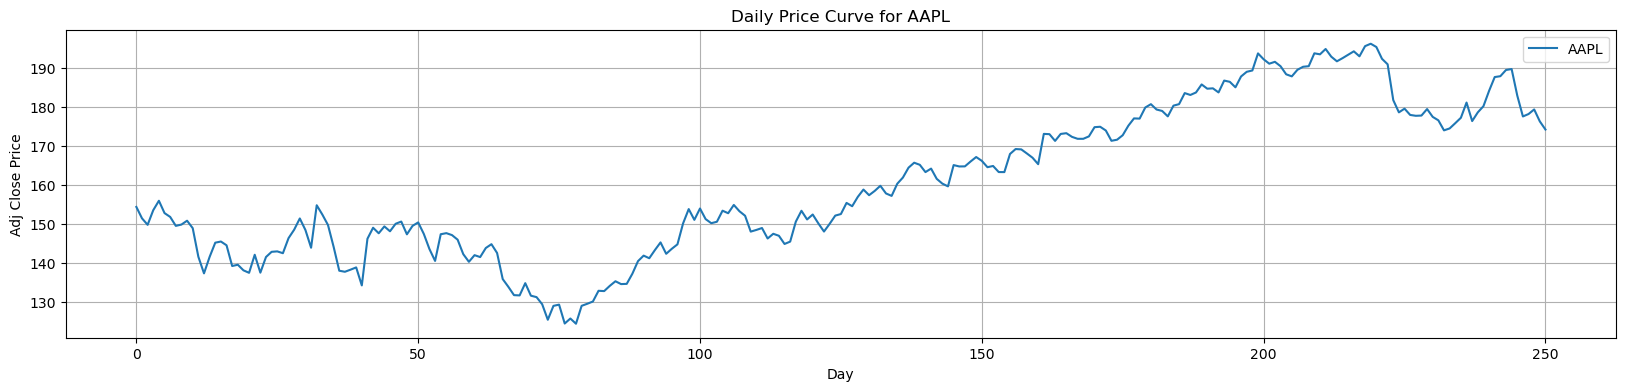

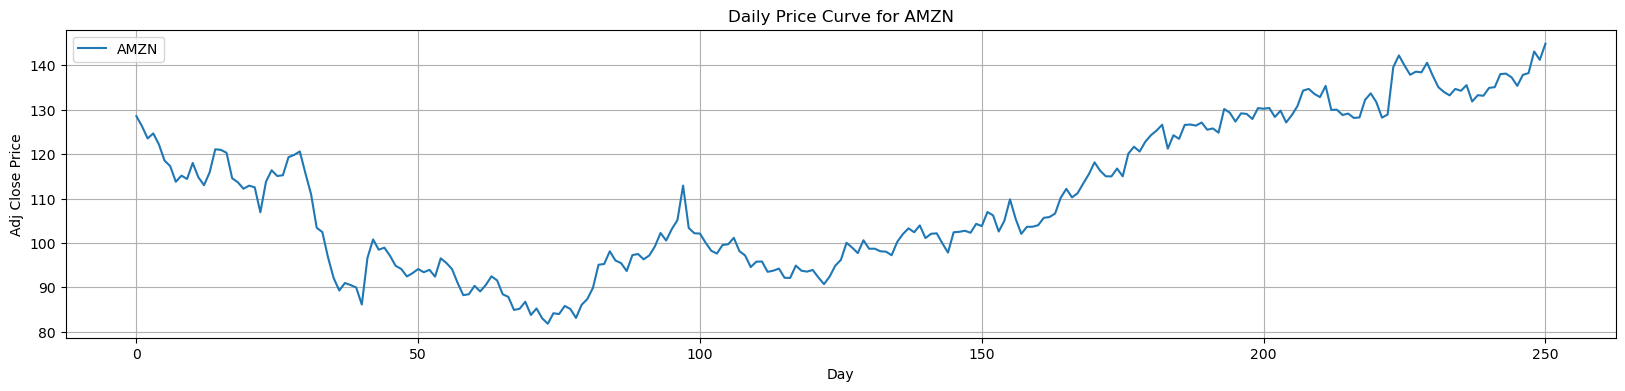

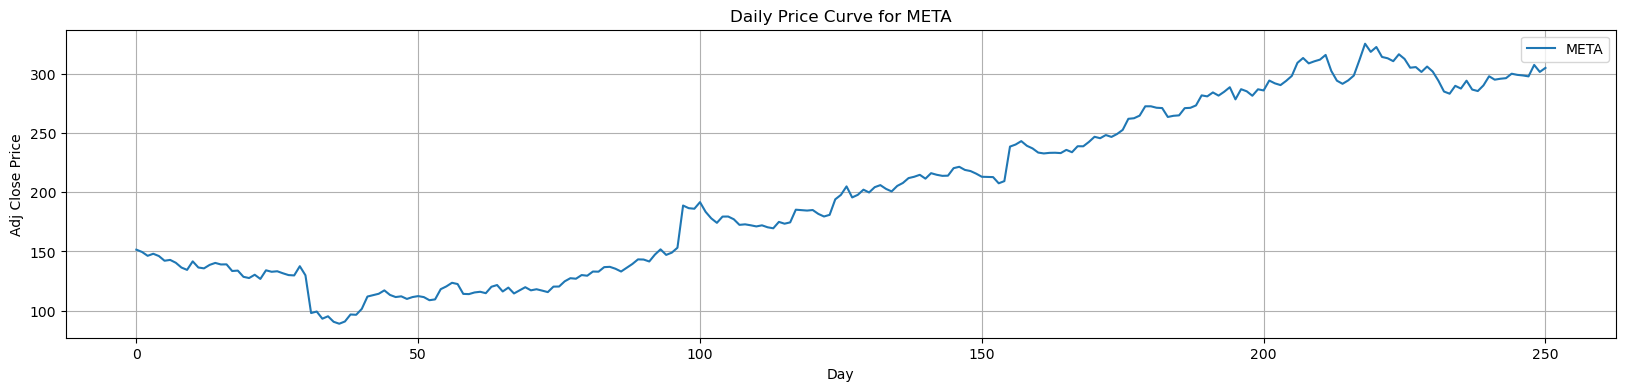

In [90]:
# Plotting

import matplotlib.pyplot as plt

for i, company in enumerate(company_names):
    plt.figure(figsize=(20, 4))  
    plt.plot(stock_data[i], label=company)
    plt.xlabel('Day')
    plt.ylabel('Adj Close Price')
    plt.title(f'Daily Price Curve for {company}')
    plt.legend()
    plt.grid(True)

plt.show()

Compute the correlation between any two stocks.

Requirements: Please do NOT use any library API to compute correlation. You should use the above formula to implement the correlation algorithm using Numpy. You should not use any type of loops in this function.

Find the two most correlated stocks.
The sample correlation coefficient formula is Σ(xi−¯x)(yi−¯y)/√Σ(xi−¯x)2∑(yi−¯y)2

where 𝑥 and 𝑦 are the sample means of [𝑥1,𝑥2,...,𝑥𝑛] and [𝑦1,𝑦2,...,𝑦𝑛]

In [91]:
IBM = np.array(stock_data[0])
MSFT = np.array(stock_data[1])
GOOG = np.array(stock_data[2])
AAPL = np.array(stock_data[3])
AMZN = np.array(stock_data[4])
META = np.array(stock_data[5])

In [92]:
stock_data_matrix = np.vstack((IBM, MSFT, GOOG, AAPL, AMZN, META))
stock_data_matrix

array([[121.5784  , 119.483681, 121.17849 , ..., 148.380005, 146.300003,
        146.550003],
       [249.806656, 243.03212 , 242.398239, ..., 337.940002, 331.769989,
        336.059998],
       [105.870003, 103.900002, 103.629997, ..., 137.740005, 136.070007,
        137.5     ],
       [154.394073, 151.47142 , 149.811249, ..., 179.360001, 176.300003,
        174.210007],
       [128.550003, 126.279999, 123.529999, ..., 143.100006, 141.229996,
        144.850006],
       [151.470001, 149.550003, 146.289993, ..., 307.559998, 301.660004,
        305.059998]])

In [93]:
mean_stocks = np.mean(stock_data_matrix, axis=1)
print(mean_stocks)

diff_stocks = stock_data_matrix - mean_stocks[:, np.newaxis]
print(diff_stocks)

numerator = np.dot(diff_stocks, diff_stocks.T)
print(numerator)

[131.33256722 279.43127441 107.839303   160.40315909 110.32932304
 201.08784876]
[[ -9.75416722 -11.84888622 -10.15407722 ...  17.04743778  14.96743578
   15.21743578]
 [-29.62461841 -36.39915441 -37.03303541 ...  58.50872759  52.33871459
   56.62872359]
 [ -1.9693      -3.939301    -4.209306   ...  29.900702    28.230704
   29.660697  ]
 [ -6.00908609  -8.93173909 -10.59191009 ...  18.95684191  15.89684391
   13.80684791]
 [ 18.22067996  15.95067596  13.20067596 ...  32.77068296  30.90067296
   34.52068296]
 [-49.61784776 -51.53784576 -54.79785576 ... 106.47214924 100.57215524
  103.97214924]]
[[  19756.19846333   25005.34149429   11031.08165288    8938.26757872
     6358.12641919   37264.46915888]
 [  25005.34149429  431473.01518008  140723.57781205  191796.56340699
   133786.20925696  721023.42867766]
 [  11031.08165288  140723.57781205   54730.88254534   64307.86620814
    55704.943132    242779.95022541]
 [   8938.26757872  191796.56340699   64307.86620814   92436.13253425
    654

In [94]:
denom_stocks = np.sqrt(np.sum(diff_stocks**2, axis=1))
print(denom_stocks)

denom_stocks[denom_stocks == 0] = 1.0

[ 140.55674464  656.86605574  233.94632407  304.03311092  264.40982367
 1133.15913709]


In [95]:
correlation_matrix = numerator / (denom_stocks[:, np.newaxis] * denom_stocks[np.newaxis, :])
correlation_matrix

array([[1.        , 0.27083468, 0.33546729, 0.20916103, 0.17108025,
        0.23396578],
       [0.27083468, 1.        , 0.91574345, 0.96038002, 0.77029476,
        0.96868294],
       [0.33546729, 0.91574345, 1.        , 0.9041219 , 0.9005336 ,
        0.91581065],
       [0.20916103, 0.96038002, 0.9041219 , 1.        , 0.81477281,
        0.94184957],
       [0.17108025, 0.77029476, 0.9005336 , 0.81477281, 1.        ,
        0.80063628],
       [0.23396578, 0.96868294, 0.91581065, 0.94184957, 0.80063628,
        1.        ]])

In [96]:
stock_names = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']

np.fill_diagonal(correlation_matrix, -2)

indices = np.triu_indices(len(stock_names), k=1)
print(indices)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]), array([1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]))


In [97]:
indices = np.triu_indices(len(stock_names), k=1)
correlations = correlation_matrix[indices]
pairs = [(stock_names[i], stock_names[j]) for i, j in zip(indices[0], indices[1])]
for pair, corr in zip(pairs, correlations):
    print(f"Correlation coefficient for {pair[0]}:{pair[1]}: {corr}")

Correlation coefficient for IBM:MSFT: 0.2708346835559287
Correlation coefficient for IBM:GOOG: 0.3354672924412754
Correlation coefficient for IBM:AAPL: 0.20916103310144338
Correlation coefficient for IBM:AMZN: 0.17108025231824592
Correlation coefficient for IBM:META: 0.23396578107427524
Correlation coefficient for MSFT:GOOG: 0.9157434538544019
Correlation coefficient for MSFT:AAPL: 0.9603800240783975
Correlation coefficient for MSFT:AMZN: 0.7702947574685054
Correlation coefficient for MSFT:META: 0.9686829416099145
Correlation coefficient for GOOG:AAPL: 0.9041219033015874
Correlation coefficient for GOOG:AMZN: 0.9005336031429375
Correlation coefficient for GOOG:META: 0.9158106452380863
Correlation coefficient for AAPL:AMZN: 0.8147728087643049
Correlation coefficient for AAPL:META: 0.9418495686161683
Correlation coefficient for AMZN:META: 0.8006362792261543


In [98]:
correlations = correlation_matrix[indices]
pairs = [(stock_names[i], stock_names[j]) for i, j in zip(indices[0], indices[1])]
print(pairs)

[('IBM', 'MSFT'), ('IBM', 'GOOG'), ('IBM', 'AAPL'), ('IBM', 'AMZN'), ('IBM', 'META'), ('MSFT', 'GOOG'), ('MSFT', 'AAPL'), ('MSFT', 'AMZN'), ('MSFT', 'META'), ('GOOG', 'AAPL'), ('GOOG', 'AMZN'), ('GOOG', 'META'), ('AAPL', 'AMZN'), ('AAPL', 'META'), ('AMZN', 'META')]


In [99]:
sorted_pairs = [pair for _, pair in sorted(zip(correlations, pairs), reverse=True)]
sorted_pairs

[('MSFT', 'META'),
 ('MSFT', 'AAPL'),
 ('AAPL', 'META'),
 ('GOOG', 'META'),
 ('MSFT', 'GOOG'),
 ('GOOG', 'AAPL'),
 ('GOOG', 'AMZN'),
 ('AAPL', 'AMZN'),
 ('AMZN', 'META'),
 ('MSFT', 'AMZN'),
 ('IBM', 'GOOG'),
 ('IBM', 'MSFT'),
 ('IBM', 'META'),
 ('IBM', 'AAPL'),
 ('IBM', 'AMZN')]

In [110]:
"""
i, j = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
print(i,j)
"""

'\ni, j = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)\nprint(i,j)\n'

In [109]:
"""
stock_names_i, stock_names_j = stock_names[i], stock_names[j]
correlation = correlation_matrix[i, j]
print(f"Correlation coefficient for {stock_names_i}:{stock_names_j}: {correlation}")
"""

'\nstock_names_i, stock_names_j = stock_names[i], stock_names[j]\ncorrelation = correlation_matrix[i, j]\nprint(f"Correlation coefficient for {stock_names_i}:{stock_names_j}: {correlation}")\n'

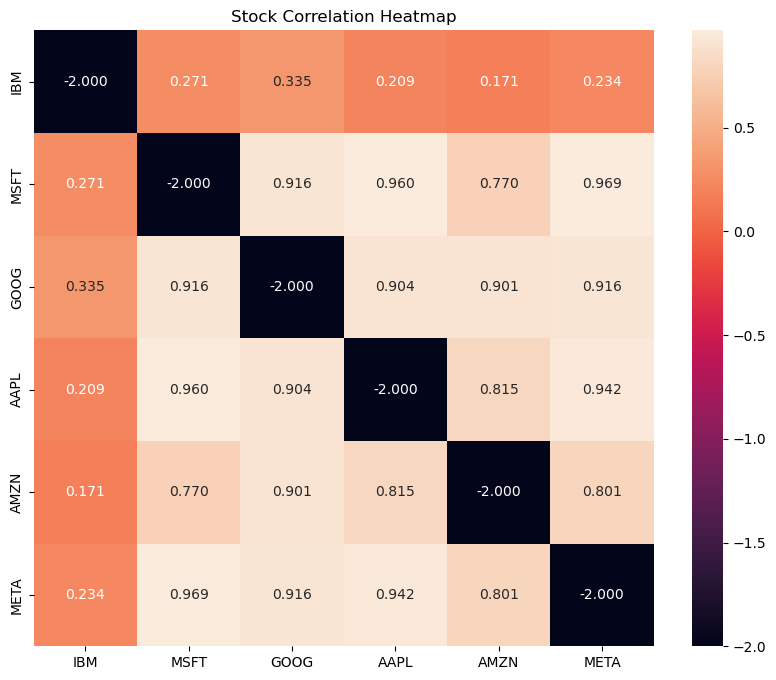

In [111]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f",
            xticklabels=stock_names, yticklabels=stock_names)
plt.title('Stock Correlation Heatmap')
plt.show()

### Conclusion

Print all stock pairs and their correlations from max to min. The format should look like below (numbers here are not the actual values),

```python
IBM:MSFT = 0.763
IBM:GOOG = 0.627
...
AMZN:META = 0.234
```
#### Tips: By definition, the correlation is symmetrical, i.e., r_xy = r_yx, so when you have IBM:MSFT, you can skip MSFT:IBM.

In [113]:
print("Final Result")
print_correlation = lambda pair: print(f"Correlation coefficient for {pair[0]}:{pair[1]} = {correlation_matrix[stock_names.index(pair[0]), stock_names.index(pair[1])]:.3f}")

results = list(map(print_correlation, sorted_pairs))

Final Result
Correlation coefficient for MSFT:META = 0.969
Correlation coefficient for MSFT:AAPL = 0.960
Correlation coefficient for AAPL:META = 0.942
Correlation coefficient for GOOG:META = 0.916
Correlation coefficient for MSFT:GOOG = 0.916
Correlation coefficient for GOOG:AAPL = 0.904
Correlation coefficient for GOOG:AMZN = 0.901
Correlation coefficient for AAPL:AMZN = 0.815
Correlation coefficient for AMZN:META = 0.801
Correlation coefficient for MSFT:AMZN = 0.770
Correlation coefficient for IBM:GOOG = 0.335
Correlation coefficient for IBM:MSFT = 0.271
Correlation coefficient for IBM:META = 0.234
Correlation coefficient for IBM:AAPL = 0.209
Correlation coefficient for IBM:AMZN = 0.171
